# Importing Required Libraries

In [239]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading and Exploring the Dataset

In [241]:
df = pd.read_csv('fashion_mnist.csv')

In [242]:
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Checking Dataset Shape 

In [243]:
df.shape

(10000, 785)

#  Data Preprocessing

In [245]:
# Handle missing or duplicate values
df.isnull().sum()           # checking for missing values

label       0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Length: 785, dtype: int64

In [246]:
df.drop_duplicates()             # checking duplicates & removing them from data

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,32,23,14,20,0,0,1,0,0,0
9996,6,0,0,0,0,0,0,0,0,0,...,0,0,0,2,52,23,28,0,0,0
9997,8,0,0,0,0,0,0,0,0,0,...,175,172,172,182,199,222,42,0,1,0
9998,8,0,1,3,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [247]:
df_cleaned = df.drop_duplicates()

In [248]:
df_cleaned.shape

(9999, 785)

In [249]:
X = df_cleaned.drop('label',axis=1)
y = df_cleaned['label']

# Normalizing Pixel Values using MinMaxScaler

In [250]:
# Scale or normalize the data
from sklearn.preprocessing import MinMaxScaler      # here we are using MinMaxScaler because it scales pixel values & work better for image data
scaler = MinMaxScaler()

In [251]:
X_scaled = scaler.fit_transform(X)

In [252]:
X_scaled

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.00487805,
        0.        ],
       [0.        , 0.02222222, 0.01376147, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

# Dimensionality Reduction using PCA

In [254]:
# importing PCA
from sklearn.decomposition import PCA

# Applying PCA (2 Components)

In [255]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [256]:
X_pca

array([[ 5.45953575, -1.30944438],
       [-0.15429049, -6.13834687],
       [-3.248256  , -0.5679609 ],
       ...,
       [ 0.99952219,  3.96947821],
       [ 6.00020406,  5.32163367],
       [ 7.61750708,  0.67858166]])

# Visualizing PCA Reduced Data

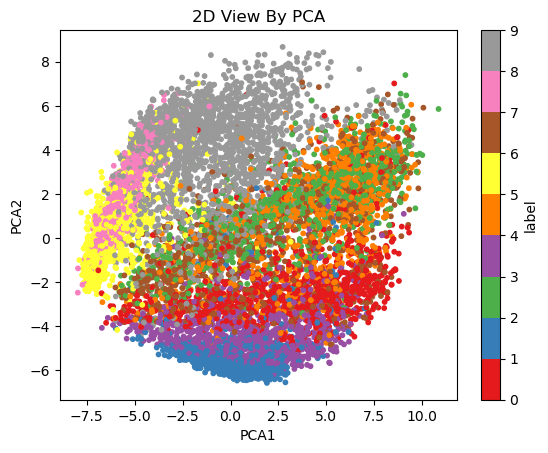

In [257]:
#  Visualize the reduced dataset using scatter plots
plt.scatter(X_pca[:,0],X_pca[:,1],c=y,cmap='Set1',s=10)          
plt.title('2D View By PCA')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.colorbar(label='label')
plt.show()

In [258]:
# calculating variance of PCA Components
print("PCA variance explained by 2 components:", pca.explained_variance_ratio_)

PCA variance explained by 2 components: [0.28998729 0.17891295]


In [259]:
# calculating sum of variance of PCA Components
print("Sum of PCA variance explained by 2 components:", sum(pca.explained_variance_ratio_))

Sum of PCA variance explained by 2 components: 0.46890023241976486


#  Clustering Algorithim Implementation

# Clustring with K-Means

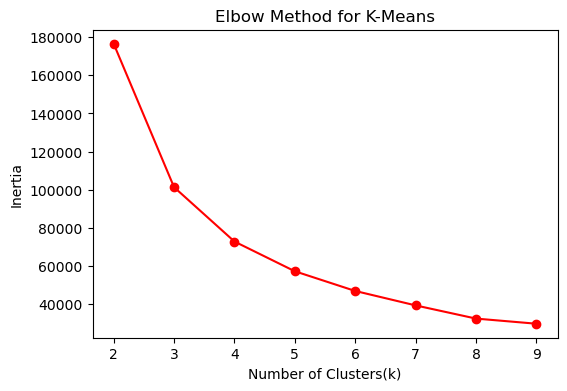

In [262]:
# K-Means with Elbow method & Visualization
from sklearn.cluster import KMeans

inertia =[]  # here intertia is applied for measuring how close the points are to their cluster centers (centroid)
k_range = range(2,10)  # creating a range for K (no of cluters)
for k in k_range:
    kmeans = KMeans(n_clusters=k,random_state=2)
    kmeans.fit(X_pca)
    inertia.append(kmeans.inertia_)  # here we are storing inertia value
plt.figure(figsize=(6,4))
plt.plot(k_range,inertia,marker='o',color='red')
plt.title("Elbow Method for K-Means")
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Inertia')
plt.show()

In [283]:
# Apply KMean with k = 10
kmeans= KMeans(n_clusters=10,random_state=42)
kmeans_labels= kmeans.fit_predict(X_pca)

In [285]:
kmeans_labels

array([1, 5, 0, ..., 9, 7, 7])

# Visualizing K-Means Clusters

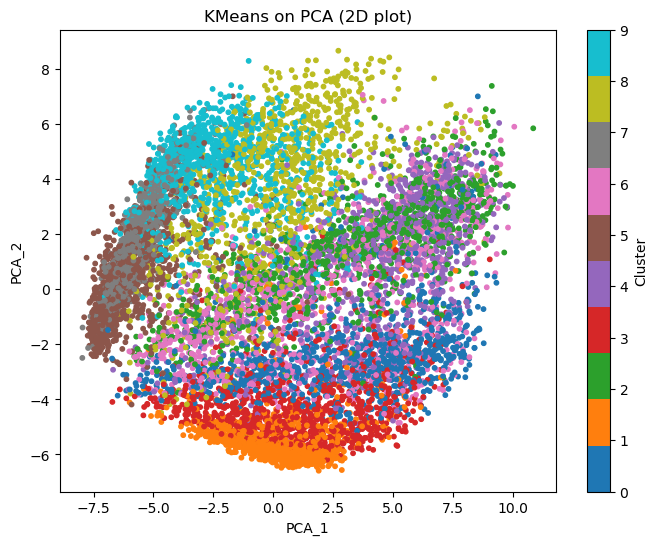

In [264]:
# Visualzing KMeans with 2D plot (PCA)
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0],X_pca[:,1],c=y,cmap='tab10',s=10)
plt.title('KMeans on PCA (2D plot)')
plt.colorbar(label='Cluster')
plt.xlabel('PCA_1')
plt.ylabel('PCA_2')
plt.show()

# Clustering with DBSCAN

In [266]:
 from sklearn.cluster import DBSCAN
# here parameters used for DBSCAN are epsilon & min_samples
dbscan = DBSCAN(eps=0.5,min_samples=5)
dbscan_labels = dbscan.fit_predict(X_pca)

#  Visualizing DBSCAN Clusters

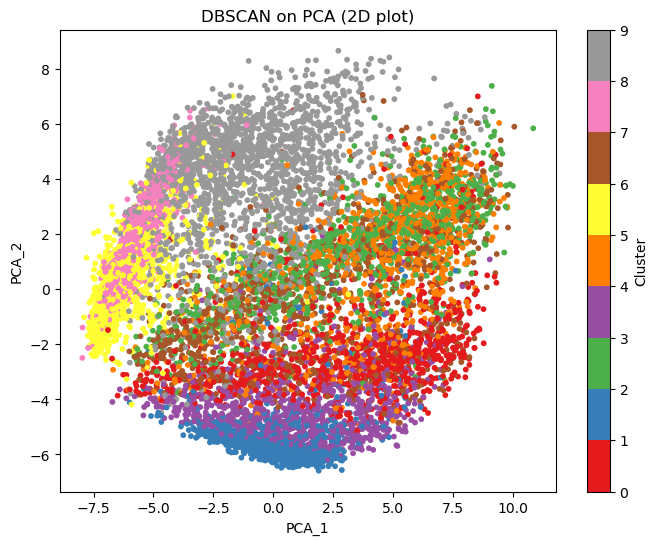

In [267]:
# Visualzing DBSCAN Clusters (2D plot)
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0],X_pca[:,1],c=y,cmap='Set1',s=10)
plt.title("DBSCAN on PCA (2D plot)")
plt.colorbar(label='Cluster')
plt.xlabel('PCA_1')
plt.ylabel('PCA_2')
plt.show()

# Clustering with Hierarchical Clustering

In [269]:
from sklearn.cluster import AgglomerativeClustering

In [270]:
agglo = AgglomerativeClustering(n_clusters=10)
agglo_labels=agglo.fit_predict(X_pca)

# Visualizing Hierarchical Clusters

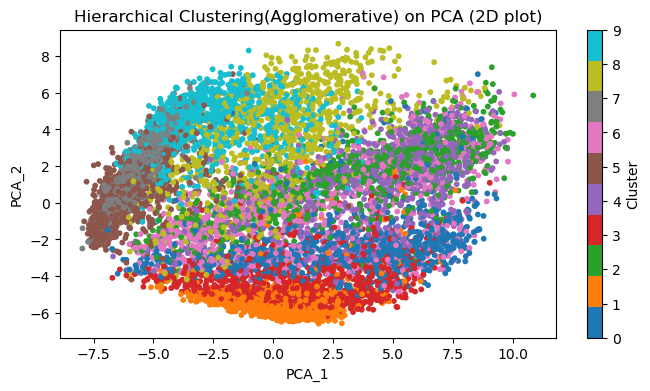

In [271]:
# Visualizing on  Hierarchical Clustering 2D plot
plt.figure(figsize=(8,4))
plt.scatter(X_pca[:,0],X_pca[:,1],c=y,cmap='tab10',s=10)
plt.title("Hierarchical Clustering(Agglomerative) on PCA (2D plot)")
plt.colorbar(label='Cluster')
plt.xlabel('PCA_1')
plt.ylabel('PCA_2')
plt.show()

#  Generating Dendrogram

In [272]:
# Ploting Dendogram
from scipy.cluster.hierarchy import dendrogram, linkage

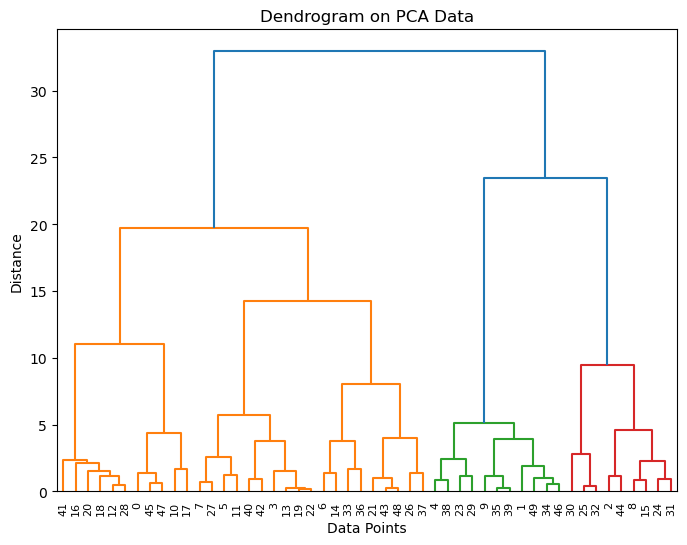

In [273]:
# applying dendrogram on smaller level
# e.g we are taking 50 points
smaller_data = X_pca[:50]
linked = linkage(smaller_data,method='ward')

plt.figure(figsize=(8,6))
dendrogram(linked,p=5)    # here is p telling about how many levels we have to show
plt.title("Dendrogram on PCA Data")
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

# Evaluation and Comparison

In [275]:
# analyzing the quality of clusters for above 3 methods using Silhouette Score & Davies-Bouldin Index
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [287]:
# For K-Means
sil_kmeans = silhouette_score(X_pca,kmeans_labels)
dbs_kmeans = davies_bouldin_score(X_pca,kmeans_labels)

In [289]:
sil_kmeans
dbs_kmeans

0.7944906979180255

In [291]:
# For DBSCAN
mask = dbscan_labels != -1  # DBSCAN  has some noise point (outliers) -1 so we have to remove them

if len(set(dbscan_labels)) > 1 and sum(mask) > 0:              # there must be atleast 2 clusters & non-noise points
    sil_dbscan = silhouette_score(X_pca[mask],dbscan_labels[mask])
    dbs_dbscan = davies_bouldin_score(X_pca[mask],dbscan_labels[mask])
else :
    sil_dbscan = None
    dbs_dbscan = None

In [293]:
sil_dbscan
dbs_dbscan

0.5879401240990255

In [295]:
# For Hierarchial Clustring
sil_hier = silhouette_score(X_pca,agglo_labels)
dbs_hier = davies_bouldin_score(X_pca,agglo_labels)

In [297]:
sil_hier
dbs_hier

0.8521878551122264

# Final Observations

In [311]:
comparing_results = {
    'Algorithm': ['KMeans','DBSCAN','Hierarchial'],
    'Silhouette_Score': [sil_kmeans,sil_dbscan,sil_hier],
    'Davies_Bouldin_Score': [dbs_kmeans,dbs_dbscan,dbs_hier]
}
comparison_data = pd.DataFrame(comparing_results)
print('Comparison Table:',comparison_data)

Comparison Table:      Algorithm  Silhouette_Score  Davies_Bouldin_Score
0       KMeans          0.384255              0.794491
1       DBSCAN          0.249171              0.587940
2  Hierarchial          0.352308              0.852188
